In [1]:
!wget https://github.com/robitussin/tensorflow_lite_projects/blob/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip?raw=True


--2025-05-19 05:46:25--  https://github.com/robitussin/tensorflow_lite_projects/blob/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip?raw=True
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/robitussin/tensorflow_lite_projects/raw/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip [following]
--2025-05-19 05:46:25--  https://github.com/robitussin/tensorflow_lite_projects/raw/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/robitussin/tensorflow_lite_projects/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip [following]
--2025-05-19 05:46:25--  https://raw.githubusercontent.com/robitussin/tensorflow_lite_projects/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip
Re

In [2]:

!unzip catsanddogs.zip?raw=True

Archive:  catsanddogs.zip?raw=True
replace catsanddogs/train/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: catsanddogs/train/.DS_Store  
replace __MACOSX/catsanddogs/train/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/catsanddogs/train/._.DS_Store  
replace catsanddogs/validation/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: catsanddogs/validation/.DS_Store  
replace __MACOSX/catsanddogs/validation/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/catsanddogs/validation/._.DS_Store  
replace catsanddogs/test/cat/cat.198.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: catsanddogs/test/cat/cat.198.jpg  
replace __MACOSX/catsanddogs/test/cat/._cat.198.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/catsanddogs/test/cat/._cat.198.jpg  
replace catsanddogs/test/cat/cat.167.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: catsanddogs/test/cat/cat.167.jpg  
replace _

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
img_height, img_width = 32, 32
batch_size = 20

In [5]:

train_ds = tf.keras.utils.image_dataset_from_directory(
    "catsanddogs/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "catsanddogs/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "catsanddogs/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 202 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


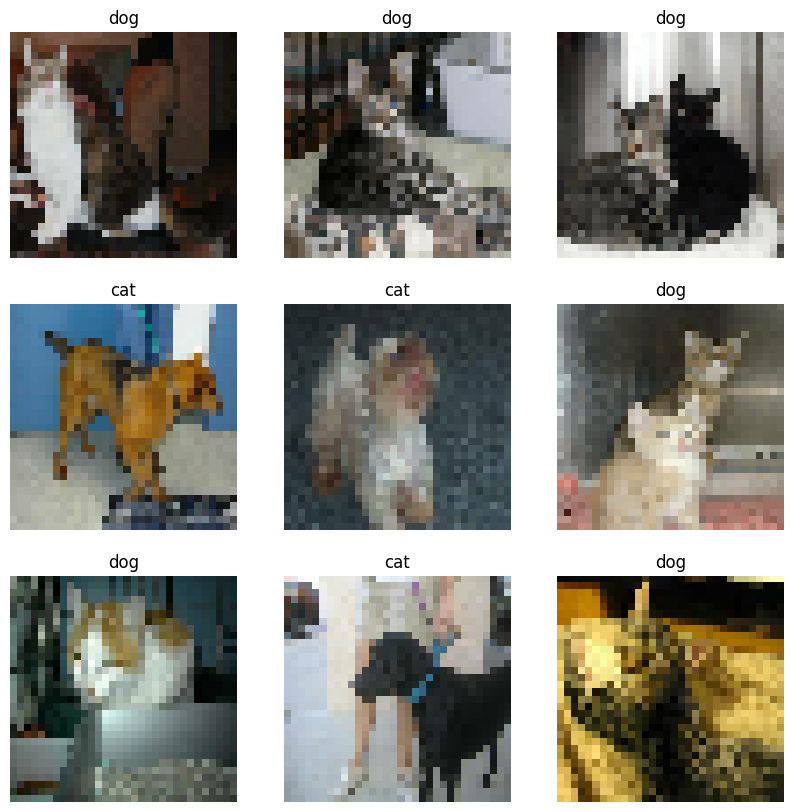

In [6]:
class_names = ["dog", "cat"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:

model = tf.keras.Sequential()

In [8]:


model.add(tf.keras.layers.Rescaling(1./255))

In [9]:
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(3))


In [10]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:

model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [12]:

model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.4962 - loss: 0.9740 - val_accuracy: 0.5150 - val_loss: 0.7008
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4759 - loss: 0.7008 - val_accuracy: 0.4900 - val_loss: 0.7023
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4590 - loss: 0.7304 - val_accuracy: 0.5050 - val_loss: 0.7032
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5661 - loss: 0.6806 - val_accuracy: 0.5200 - val_loss: 0.6936
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5244 - loss: 0.6840 - val_accuracy: 0.5000 - val_loss: 0.7459
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4945 - loss: 0.7318 - val_accuracy: 0.5050 - val_loss: 0.7028
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5820 - loss: 0.6861 - val_accuracy: 0.5200 - val_loss: 0.6970
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6545 - loss: 0.6721 - val_accuracy: 0.5000 - 

In [13]:

model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5470 - loss: 0.6875


[0.7072925567626953, 0.5049999952316284]

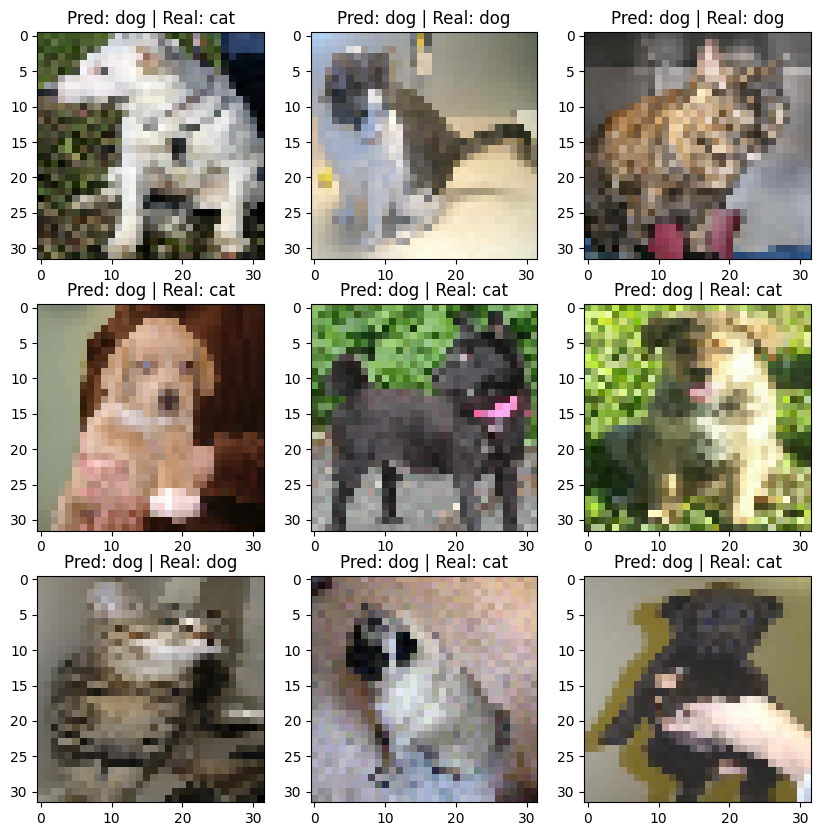

In [14]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [15]:

model.save('catdogmodel.keras')